# JSON and APIs

_November 3, 2020_

Agenda today:
- Introduction to API and Remote Server Model 
- Getting data through an API: Case study with YELP API

In [14]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [15]:
import pandas as pd
import numpy as np
import requests
import json
from ipywidgets import interact, interactive, fixed, interact_manual
#from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Part I. APIs and Remote Server Model
API stands for Application Programming Interface. At some point or the other, large companies would build API for their products for their clients or internal use. It allows the company's application to communicate with another application. But what _exactly_ is an API?

#### Remote server 
When we think about the world of Web, we can think of it as a collection of _servers_. And servers are nothing but huge computers that store a huge amount of data from users and are optimized to process requests. For example, when you type in www.facebook.com, your browser sends a _request_ to the Facebook server, and gets a response from the server, thus interpreting the code and displaying your homepage. 

In this case, your browser is the _client_, and Facebook’s server is an API. To put it broadly, whenever you visit a website, you are interacting with its API. However, an API isn’t the same as the remote server — rather it is the part of the server that receives __requests__ and sends __responses__.

<img src='status-code.png' width = 500>

## Part II. Getting Data Through APIs

The `get()` method send a request to YELP's API, and stored information in a variable called `request`. Next, let's see if it's successful. 

#### YELP API
Sometimes you need _authentication_ to get data from a service in additional to just sending a `GET()` request. Yelp API is a perfect example. 

You will need to go to the YELP's developer's [website](https://www.yelp.com/developers/v3/manage_app) and request for a client ID and API key, which function like a key into a house of data. 

<img src='yelp.png' width = 500>

In [11]:
def f(x):
    return x

In [14]:
interact(f, x=[1,2,3,4,5]);

interactive(children=(Dropdown(description='x', options=(1, 2, 3, 4, 5), value=1), Output()), _dom_classes=('w…

In [15]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

In [2]:
# lets try to get some data from yelp!
url = 'https://api.yelp.com/v3/businesses/search'
response = requests.get(url)

In [5]:
# check the status code
response.status_code

# what happened here?

400

In [4]:
# now we are ready to get our data 

# usually, services would limit you to a certain amount of API calls. This varies from service
# to service, so you have to watch out to it 

MY_API_KEY = ""


term = 'Axe Throwing'
location = 'Brooklyn'
SEARCH_LIMIT = 30

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)

In [5]:
response.status_code

400

In [5]:
# examine the response object

print(response)


<Response [200]>


In [6]:
# how are we going to parse the response.text object?
response.text

'{"businesses": [{"id": "X0DNGKUQPjf0AfaXfXU2Qg", "alias": "kick-axe-throwing-brooklyn-2", "name": "Kick Axe Throwing", "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/WjKylwrUBKnGIE_ldj142Q/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/kick-axe-throwing-brooklyn-2?adjust_creative=_ers4aPp5J4lpyzx8rZXNQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_ers4aPp5J4lpyzx8rZXNQ", "review_count": 403, "categories": [{"alias": "bars", "title": "Bars"}, {"alias": "axethrowing", "title": "Axe Throwing"}, {"alias": "tradamerican", "title": "American (Traditional)"}], "rating": 4.5, "coordinates": {"latitude": 40.6790268, "longitude": -73.983077}, "transactions": [], "location": {"address1": "622 Degraw St", "address2": null, "address3": "", "city": "Brooklyn", "zip_code": "11217", "country": "US", "state": "NY", "display_address": ["622 Degraw St", "Brooklyn, NY 11217"]}, "phone": "+18335425293", "display_phone": "(833) 542-5293", "distance": 4733.61662

In [7]:
response = '''{"businesses": [{"id": "X0DNGKUQPjf0AfaXfXU2Qg", "alias": "kick-axe-throwing-brooklyn-2", "name": "Kick Axe Throwing", "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/WjKylwrUBKnGIE_ldj142Q/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/kick-axe-throwing-brooklyn-2?adjust_creative=_ers4aPp5J4lpyzx8rZXNQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_ers4aPp5J4lpyzx8rZXNQ", "review_count": 403, "categories": [{"alias": "bars", "title": "Bars"}, {"alias": "axethrowing", "title": "Axe Throwing"}, {"alias": "tradamerican", "title": "American (Traditional)"}], "rating": 4.5, "coordinates": {"latitude": 40.6790268, "longitude": -73.983077}, "transactions": [], "location": {"address1": "622 Degraw St", "address2": null, "address3": "", "city": "Brooklyn", "zip_code": "11217", "country": "US", "state": "NY", "display_address": ["622 Degraw St", "Brooklyn, NY 11217"]}, "phone": "+18335425293", "display_phone": "(833) 542-5293", "distance": 4733.616620254917}, {"id": "4E6BkrEVf_0TjRVYE7gxeQ", "alias": "bury-the-hatchet-brooklyn-axe-throwing-brooklyn-2", "name": "Bury the Hatchet Brooklyn - Axe Throwing", "image_url": "https://s3-media3.fl.yelpcdn.com/bphoto/SH8_Nwmd13LkntwuzcEPeg/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/bury-the-hatchet-brooklyn-axe-throwing-brooklyn-2?adjust_creative=_ers4aPp5J4lpyzx8rZXNQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_ers4aPp5J4lpyzx8rZXNQ", "review_count": 155, "categories": [{"alias": "axethrowing", "title": "Axe Throwing"}, {"alias": "teambuilding", "title": "Team Building Activities"}], "rating": 4.5, "coordinates": {"latitude": 40.7283195, "longitude": -73.9600679}, "transactions": [], "location": {"address1": "25 Noble St", "address2": null, "address3": "", "city": "Brooklyn", "zip_code": "11222", "country": "US", "state": "NY", "display_address": ["25 Noble St", "Brooklyn, NY 11222"]}, "phone": "+19172439696", "display_phone": "(917) 243-9696", "distance": 8652.979400045351}, {"id": "PhEkSzYZHKYS7uyXePmkMw", "alias": "axes-and-arrows-long-island-city-2", "name": "Axes And Arrows", "image_url": "https://s3-media4.fl.yelpcdn.com/bphoto/Uinh_osn8ykDeLoigmgo0Q/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/axes-and-arrows-long-island-city-2?adjust_creative=_ers4aPp5J4lpyzx8rZXNQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_ers4aPp5J4lpyzx8rZXNQ", "review_count": 49, "categories": [{"alias": "axethrowing", "title": "Axe Throwing"}, {"alias": "archery", "title": "Archery"}], "rating": 4.5, "coordinates": {"latitude": 40.7425127, "longitude": -73.933816}, "transactions": [], "location": {"address1": "47- 11 Van Dam St", "address2": null, "address3": "", "city": "Long Island City", "zip_code": "11101", "country": "US", "state": "NY", "display_address": ["47- 11 Van Dam St", "Long Island City, NY 11101"]}, "phone": "+17183619152", "display_phone": "(718) 361-9152", "distance": 9996.588059135383}, {"id": "4sPiNeQGD8mzt9ess7xZrQ", "alias": "mad-axe-brooklyn", "name": "Mad Axe", "image_url": "https://s3-media4.fl.yelpcdn.com/bphoto/UOC-BswrAMfq9dX6MXxa8Q/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/mad-axe-brooklyn?adjust_creative=_ers4aPp5J4lpyzx8rZXNQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_ers4aPp5J4lpyzx8rZXNQ", "review_count": 13, "categories": [{"alias": "axethrowing", "title": "Axe Throwing"}], "rating": 5.0, "coordinates": {"latitude": 40.707, "longitude": -73.93364}, "transactions": [], "location": {"address1": "94 Bogart Street 2nd", "address2": null, "address3": "", "city": "Brooklyn", "zip_code": "11206", "country": "US", "state": "NY", "display_address": ["94 Bogart Street 2nd", "Brooklyn, NY 11206"]}, "phone": "+19292950229", "display_phone": "(929) 295-0229", "distance": 6101.731538019727}, {"id": "lZVE27r_W_3GXxNwECYC4g", "alias": "live-axe-new-york", "name": "Live Axe", "image_url": "https://s3-media2.fl.yelpcdn.com/bphoto/-Z1qvni_2N-K85FHmaesaQ/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/live-axe-new-york?adjust_creative=_ers4aPp5J4lpyzx8rZXNQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_ers4aPp5J4lpyzx8rZXNQ", "review_count": 6, "categories": [{"alias": "axethrowing", "title": "Axe Throwing"}, {"alias": "bars", "title": "Bars"}], "rating": 4.5, "coordinates": {"latitude": 40.71769, "longitude": -74.00144}, "transactions": [], "location": {"address1": "96 Lafayette St", "address2": null, "address3": null, "city": "New York", "zip_code": "10013", "country": "US", "state": "NY", "display_address": ["96 Lafayette St", "New York, NY 10013"]}, "phone": "+18888129060", "display_phone": "(888) 812-9060", "distance": 8955.976101576549}, {"id": "b9DAbR-1eIfLr6TPI_r59Q", "alias": "axe-kicking-entertainment-mineola", "name": "Axe Kicking Entertainment", "image_url": "https://s3-media2.fl.yelpcdn.com/bphoto/bBooTB1Ja2PSGTGLhbAjVg/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/axe-kicking-entertainment-mineola?adjust_creative=_ers4aPp5J4lpyzx8rZXNQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_ers4aPp5J4lpyzx8rZXNQ", "review_count": 7, "categories": [{"alias": "axethrowing", "title": "Axe Throwing"}, {"alias": "archery", "title": "Archery"}, {"alias": "bowling", "title": "Bowling"}], "rating": 5.0, "coordinates": {"latitude": 40.74638, "longitude": -73.65027}, "transactions": [], "location": {"address1": "360 Jericho Turnpike", "address2": null, "address3": "", "city": "Mineola", "zip_code": "11501", "country": "US", "state": "NY", "display_address": ["360 Jericho Turnpike", "Mineola, NY 11501"]}, "phone": "+15162806040", "display_phone": "(516) 280-6040", "distance": 26518.825160012875}, {"id": "Ub7igTH4-w5haq_bHmvFjQ", "alias": "hatchets-and-hops-brooklyn", "name": "Hatchets & Hops", "image_url": "https://s3-media2.fl.yelpcdn.com/bphoto/XfyHGdIjuF3dufr1NgMqBA/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/hatchets-and-hops-brooklyn?adjust_creative=_ers4aPp5J4lpyzx8rZXNQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_ers4aPp5J4lpyzx8rZXNQ", "review_count": 1, "categories": [{"alias": "axethrowing", "title": "Axe Throwing"}, {"alias": "bars", "title": "Bars"}], "rating": 5.0, "coordinates": {"latitude": 40.721237, "longitude": -73.957603}, "transactions": [], "location": {"address1": "98 North 11th St", "address2": null, "address3": "", "city": "Brooklyn", "zip_code": "11249", "country": "US", "state": "NY", "display_address": ["98 North 11th St", "Brooklyn, NY 11249"]}, "phone": "+18559512973", "display_phone": "(855) 951-2973", "distance": 7814.584675164627}, {"id": "K_Jm8V-XuOFlbHb_VUzk-w", "alias": "indoor-extreme-sports-long-island-city", "name": "Indoor Extreme Sports", "image_url": "https://s3-media2.fl.yelpcdn.com/bphoto/wQE-gOKf-shCB4sDI2WmhQ/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/indoor-extreme-sports-long-island-city?adjust_creative=_ers4aPp5J4lpyzx8rZXNQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_ers4aPp5J4lpyzx8rZXNQ", "review_count": 509, "categories": [{"alias": "paintball", "title": "Paintball"}, {"alias": "lasertag", "title": "Laser Tag"}, {"alias": "axethrowing", "title": "Axe Throwing"}], "rating": 4.0, "coordinates": {"latitude": 40.7422746, "longitude": -73.9338804}, "transactions": [], "location": {"address1": "47 11 Van Dam St", "address2": null, "address3": "", "city": "Long Island City", "zip_code": "11101", "country": "US", "state": "NY", "display_address": ["47 11 Van Dam St", "Long Island City, NY 11101"]}, "phone": "+17183619152", "display_phone": "(718) 361-9152", "distance": 10012.024588128}, {"id": "yXOjBSwyqOKDY7oHx3z7HA", "alias": "tomahawks-jersey-city", "name": "Tomahawks", "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/AcR-ExIWOWPNXRr6G5cGQw/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/tomahawks-jersey-city?adjust_creative=_ers4aPp5J4lpyzx8rZXNQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_ers4aPp5J4lpyzx8rZXNQ", "review_count": 14, "categories": [{"alias": "axethrowing", "title": "Axe Throwing"}], "rating": 4.5, "coordinates": {"latitude": 40.7411216, "longitude": -74.0493572}, "transactions": [], "location": {"address1": "7 Sherman Ave", "address2": "Fl 2", "address3": "", "city": "Jersey City", "zip_code": "07307", "country": "US", "state": "NJ", "display_address": ["7 Sherman Ave", "Fl 2", "Jersey City, NJ 07307"]}, "phone": "+12014209722", "display_phone": "(201) 420-9722", "distance": 13556.0314007906}, {"id": "wuy6jyi5cxm1pwnUTWyBLw", "alias": "stumpys-hatchet-house-fairfield-fairfield-3", "name": "Stumpy\'s Hatchet House - Fairfield", "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/yKG858jIoenW0jLpq6Hg1A/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/stumpys-hatchet-house-fairfield-fairfield-3?adjust_creative=_ers4aPp5J4lpyzx8rZXNQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_ers4aPp5J4lpyzx8rZXNQ", "review_count": 45, "categories": [{"alias": "axethrowing", "title": "Axe Throwing"}, {"alias": "recreation", "title": "Recreation Centers"}], "rating": 5.0, "coordinates": {"latitude": 40.882466, "longitude": -74.2942046508915}, "transactions": [], "location": {"address1": "373 US-46 W", "address2": "Ste D140", "address3": "", "city": "Fairfield", "zip_code": "07004", "country": "US", "state": "NJ", "display_address": ["373 US-46 W", "Ste D140", "Fairfield, NJ 07004"]}, "phone": "+19737213120", "display_phone": "(973) 721-3120", "distance": 39342.64728763023}, {"id": "oKkn9nKh6jB-fsQIDbP4tQ", "alias": "bury-the-hatchet-matawan", "name": "Bury The Hatchet", "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/EsKEUTyvjjzdr6SzTzubSQ/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/bury-the-hatchet-matawan?adjust_creative=_ers4aPp5J4lpyzx8rZXNQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_ers4aPp5J4lpyzx8rZXNQ", "review_count": 91, "categories": [{"alias": "axethrowing", "title": "Axe Throwing"}, {"alias": "teambuilding", "title": "Team Building Activities"}], "rating": 5.0, "coordinates": {"latitude": 40.4234040521118, "longitude": -74.2643531039357}, "transactions": [], "location": {"address1": "419 Route 34", "address2": "", "address3": null, "city": "Matawan", "zip_code": "07747", "country": "US", "state": "NJ", "display_address": ["419 Route 34", "Matawan, NJ 07747"]}, "phone": "+17329626284", "display_phone": "(732) 962-6284", "distance": 37446.224760844736}, {"id": "xC9gtq17G9XU5d-yjkprfA", "alias": "bury-the-hatchet-paramus-axe-throwing-paramus-2", "name": "Bury the Hatchet Paramus - Axe Throwing", "image_url": "https://s3-media4.fl.yelpcdn.com/bphoto/2z7jvctXJEeKUBKB-XIPSg/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/bury-the-hatchet-paramus-axe-throwing-paramus-2?adjust_creative=_ers4aPp5J4lpyzx8rZXNQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_ers4aPp5J4lpyzx8rZXNQ", "review_count": 75, "categories": [{"alias": "axethrowing", "title": "Axe Throwing"}], "rating": 4.0, "coordinates": {"latitude": 40.9486345940514, "longitude": -74.0677446595245}, "transactions": [], "location": {"address1": "49 E Midland Ave", "address2": null, "address3": "", "city": "Paramus", "zip_code": "07652", "country": "US", "state": "NJ", "display_address": ["49 E Midland Ave", "Paramus, NJ 07652"]}, "phone": "+12016883358", "display_phone": "(201) 688-3358", "distance": 34674.4395003575}, {"id": "1BUoVTCYSpGfG0oobAr5Hg", "alias": "bury-the-hatchet-axe-throwing-bloomfield-bloomfield", "name": "Bury The Hatchet Axe Throwing- Bloomfield", "image_url": "https://s3-media2.fl.yelpcdn.com/bphoto/Y6OdaWjNZKFNKuSdl-rU3w/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/bury-the-hatchet-axe-throwing-bloomfield-bloomfield?adjust_creative=_ers4aPp5J4lpyzx8rZXNQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_ers4aPp5J4lpyzx8rZXNQ", "review_count": 91, "categories": [{"alias": "axethrowing", "title": "Axe Throwing"}], "rating": 4.5, "coordinates": {"latitude": 40.79607, "longitude": -74.2003299}, "transactions": [], "location": {"address1": "672 Bloomfield Ave", "address2": null, "address3": "", "city": "Bloomfield", "zip_code": "07003", "country": "US", "state": "NJ", "display_address": ["672 Bloomfield Ave", "Bloomfield, NJ 07003"]}, "phone": "+19738427725", "display_phone": "(973) 842-7725", "distance": 27173.957270887662}, {"id": "5izrkxTF_OWgwEdgzjNCAA", "alias": "bury-the-hatchet-woodbridge-axe-throwing-avenel", "name": "Bury The Hatchet Woodbridge - Axe Throwing", "image_url": "https://s3-media2.fl.yelpcdn.com/bphoto/ZhVxhmy3BDOGaEwflbF9RA/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/bury-the-hatchet-woodbridge-axe-throwing-avenel?adjust_creative=_ers4aPp5J4lpyzx8rZXNQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_ers4aPp5J4lpyzx8rZXNQ", "review_count": 8, "categories": [{"alias": "axethrowing", "title": "Axe Throwing"}], "rating": 4.5, "coordinates": {"latitude": 40.5919, "longitude": -74.28943}, "transactions": [], "location": {"address1": "1600 St Georges Ave", "address2": null, "address3": "", "city": "Avenel", "zip_code": "07001", "country": "US", "state": "NJ", "display_address": ["1600 St Georges Ave", "Avenel, NJ 07001"]}, "phone": "+17322986614", "display_phone": "(732) 298-6614", "distance": 30246.00489811494}, {"id": "BOYnPH11OTCMPzxiPJXHpw", "alias": "hatchet-house-hackensack-3", "name": "Hatchet House", "image_url": "https://s3-media3.fl.yelpcdn.com/bphoto/1BayJ29kv-F92Dqy7uboDA/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/hatchet-house-hackensack-3?adjust_creative=_ers4aPp5J4lpyzx8rZXNQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_ers4aPp5J4lpyzx8rZXNQ", "review_count": 1, "categories": [{"alias": "axethrowing", "title": "Axe Throwing"}, {"alias": "venues", "title": "Venues & Event Spaces"}, {"alias": "paintball", "title": "Paintball"}], "rating": 3.0, "coordinates": {"latitude": 40.8832357904038, "longitude": -74.0432552620768}, "transactions": [], "location": {"address1": "157A Main St", "address2": "", "address3": null, "city": "Hackensack", "zip_code": "07601", "country": "US", "state": "NJ", "display_address": ["157A Main St", "Hackensack, NJ 07601"]}, "phone": "+18332934653", "display_phone": "(833) 293-4653", "distance": 27125.32070094518}, {"id": "LN1itZNPsylqInDsLG4M_g", "alias": "new-york-sports-clubs-new-york-73", "name": "New York Sports Clubs", "image_url": "https://s3-media2.fl.yelpcdn.com/bphoto/eMLTokizDk84J50jB3gmzw/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/new-york-sports-clubs-new-york-73?adjust_creative=_ers4aPp5J4lpyzx8rZXNQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_ers4aPp5J4lpyzx8rZXNQ", "review_count": 105, "categories": [{"alias": "gyms", "title": "Gyms"}, {"alias": "healthtrainers", "title": "Trainers"}, {"alias": "sports_clubs", "title": "Sports Clubs"}], "rating": 2.0, "coordinates": {"latitude": 40.7455891, "longitude": -73.9980521}, "transactions": [], "location": {"address1": "270 8th Ave", "address2": "", "address3": "", "city": "New York", "zip_code": "10011", "country": "US", "state": "NY", "display_address": ["270 8th Ave", "New York, NY 10011"]}, "phone": "+12122433400", "display_phone": "(212) 243-3400", "distance": 11489.778200039469}, {"id": "0OJWRkAI-iot-dtKX6BjbQ", "alias": "queens-archery-flushing", "name": "Queens Archery", "image_url": "https://s3-media3.fl.yelpcdn.com/bphoto/lXOzZPUHPPdu8iGsaH38nA/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/queens-archery-flushing?adjust_creative=_ers4aPp5J4lpyzx8rZXNQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_ers4aPp5J4lpyzx8rZXNQ", "review_count": 363, "categories": [{"alias": "sports_clubs", "title": "Sports Clubs"}, {"alias": "archery", "title": "Archery"}], "rating": 4.5, "coordinates": {"latitude": 40.76137, "longitude": -73.79556}, "transactions": [], "location": {"address1": "170-20 39th Ave", "address2": "", "address3": "", "city": "Flushing", "zip_code": "11358", "country": "US", "state": "NY", "display_address": ["170-20 39th Ave", "Flushing, NY 11358"]}, "phone": "+17184611756", "display_phone": "(718) 461-1756", "distance": 17134.395523061943}], "total": 27, "region": {"center": {"longitude": -73.93936157226562, "latitude": 40.652330148320374}}}'''

In [5]:
# json.load() takes in a json object
# json.loads() takes in a string
j = response.json()

AttributeError: 'str' object has no attribute 'json'

In [8]:
# working with JSON

axe_throwing = response
axe_throwing = json.loads(axe_throwing)

In [9]:
axe_throwing

{'businesses': [{'id': 'X0DNGKUQPjf0AfaXfXU2Qg',
   'alias': 'kick-axe-throwing-brooklyn-2',
   'name': 'Kick Axe Throwing',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/WjKylwrUBKnGIE_ldj142Q/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/kick-axe-throwing-brooklyn-2?adjust_creative=_ers4aPp5J4lpyzx8rZXNQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_ers4aPp5J4lpyzx8rZXNQ',
   'review_count': 403,
   'categories': [{'alias': 'bars', 'title': 'Bars'},
    {'alias': 'axethrowing', 'title': 'Axe Throwing'},
    {'alias': 'tradamerican', 'title': 'American (Traditional)'}],
   'rating': 4.5,
   'coordinates': {'latitude': 40.6790268, 'longitude': -73.983077},
   'transactions': [],
   'location': {'address1': '622 Degraw St',
    'address2': None,
    'address3': '',
    'city': 'Brooklyn',
    'zip_code': '11217',
    'country': 'US',
    'state': 'NY',
    'display_address': ['622 Degraw St', 'Brooklyn, NY 11217']},
   'phone': '+

In [10]:
# cleaning and exploring the data
for key in axe_throwing.keys():
    print(key, type(axe_throwing[key]))

businesses <class 'list'>
total <class 'int'>
region <class 'dict'>


In [11]:
keys = axe_throwing['region']['center'].keys()

In [12]:
# explore which objects in the dataframe we need
df = pd.DataFrame(axe_throwing['businesses'])

In [13]:
for key in keys:
    df[key] = df.coordinates.apply(lambda x: x[key])

In [9]:
# let's turn the things we need into a pandas dataframe
df[key]

0     40.679027
1     40.728319
2     40.742513
3     40.707000
4     40.717690
5     40.746380
6     40.721237
7     40.742275
8     40.741122
9     40.882466
10    40.423404
11    40.948635
12    40.796070
13    40.591900
14    40.883236
15    40.745589
16    40.761370
Name: latitude, dtype: float64

(array([9., 3., 1., 1., 0., 0., 0., 2., 0., 1.]),
 array([  1. ,  51.8, 102.6, 153.4, 204.2, 255. , 305.8, 356.6, 407.4,
        458.2, 509. ]),
 <a list of 10 Patch objects>)

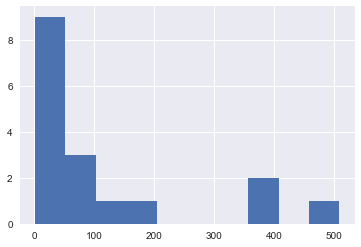

In [10]:
# you can do some analysis and visualization from here on! 

# visualize the review count - what's the appropriate plot?
plt.hist(df.review_count)

In [11]:
df.categories[0]

[{'alias': 'bars', 'title': 'Bars'},
 {'alias': 'axethrowing', 'title': 'Axe Throwing'},
 {'alias': 'tradamerican', 'title': 'American (Traditional)'}]

In [12]:
df['categories'].apply(lambda x: [i['alias'] for i in x])

0        [bars, axethrowing, tradamerican]
1              [axethrowing, teambuilding]
2                   [axethrowing, archery]
3                            [axethrowing]
4                      [axethrowing, bars]
5          [axethrowing, archery, bowling]
6                      [axethrowing, bars]
7       [paintball, lasertag, axethrowing]
8                            [axethrowing]
9                [axethrowing, recreation]
10             [axethrowing, teambuilding]
11                           [axethrowing]
12                           [axethrowing]
13                           [axethrowing]
14        [axethrowing, venues, paintball]
15    [gyms, healthtrainers, sports_clubs]
16                 [sports_clubs, archery]
Name: categories, dtype: object

In [ ]:
df.dropna()

In [15]:
df.rating.unique()

array([4.5, 5. , 4. , 3. , 2. ])

In [26]:
x = [[1,2,3,4,5,6,5,6,5,6,7,8,9,10],[1,2,3,4,5,6,5,6,5,6,7,8,9,10]aa]

In [27]:
import seaborn as sns

In [19]:
import PIL

In [21]:
!ls

Data_Viz.ipynb                   aq.csv
Intro_to_SQL.ipynb               auto-mpg.csv
Intro_to_libraries_1-Copy1.ipynb figure-axes.png
Intro_to_libraries_1.ipynb       readme.md
Introduction_to_APIs.ipynb       sql-joins-better.png
Pandas_II.ipynb                  sql-joins.png
Pandas_III.ipynb                 stack.png
Phase1_Review.ipynb              status-code.png
Python_Fundamentals.ipynb        tips.csv
SQL_II.ipynb                     unstack.png
Statistics_Fundamentals.ipynb    yelp.png
aggregate.db


In [24]:
from PIL import Image
img = Image.open('unstack.png')
plt.imshow(img)

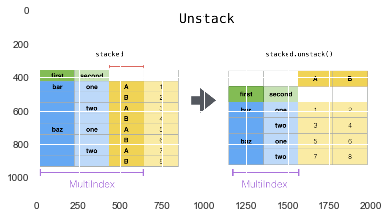

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


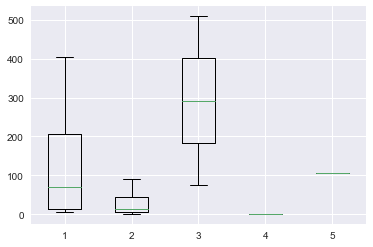

In [18]:
data = []
for rate in df.rating.unique():
    data.append(df[df.rating == rate]['review_count'])
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticks = df.rating.unique()

In [32]:
df.distance.value_counts()

6101.731538     1
10012.024588    1
37446.224761    1
4733.616620     1
34674.439500    1
27173.957271    1
26518.825160    1
9996.588059     1
7814.584675     1
27125.320701    1
8955.976102     1
39342.647288    1
11489.778200    1
17134.395523    1
30246.004898    1
13556.031401    1
8652.979400     1
Name: distance, dtype: int64

In [35]:
df.review_count.dtype

dtype('int64')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


TypeError: _bivariate_kdeplot() got multiple values for argument 'x'

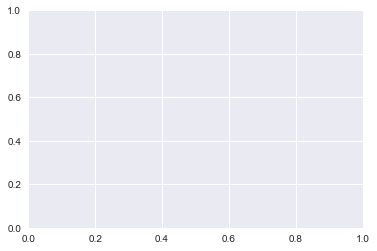

In [36]:
sns.kdeplot(
    data=df.loc[:,['review_count','distance']],
    x="review_count",
    y="distance",
)

In [50]:
df.drop('location',axis=1,inplace=True)

In [16]:
import time

In [39]:
# can you do some other queries using sql/pandas?
for i in tqdm(range(100)):
    time.sleep(1)

In [18]:
from IPython.display import display
def f(a, b):
    display(a + b)
    return a+b

In [19]:
w = interactive(f, a=10,b=20)
type(w)

ipywidgets.widgets.interaction.interactive

In [20]:
w.children

(IntSlider(value=10, description='a', max=30, min=-10),
 IntSlider(value=20, description='b', max=60, min=-20),
 Output())

In [24]:
display(w)

In [22]:
w.kwargs

{'a': 10, 'b': 20}

In [23]:
w.result

30

In [25]:
def f(x):
    return x

In [29]:
from ipywidgets import FloatSlider
#interact_manual(f,x=FloatSlider(min=1e5, max=1e7, step=1e5));


In [27]:
import ipywidgets as widgets

In [31]:
slow = interactive(f, {'manual': True}, x=widgets.FloatSlider(min=1e4, max=1e6, step=1e4))
slow

In [32]:
interact(f, x=FloatSlider(min=1e5, max=1e7, step=1e5, 
                          continuous_update=False));


interactive(children=(FloatSlider(value=100000.0, continuous_update=False, description='x', max=10000000.0, mi…

In [36]:
a = widgets.IntSlider(min=45,max=90)
b = widgets.IntSlider(min=50)
c = widgets.IntSlider(min=1)
ui = widgets.HBox([a, b, c])
def f(a, b, c):
    print(((a-b)/c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

Output()

In [46]:
x_widget = FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value
y_widget.observe(update_x_range, 'value')

def printer(x, y):
    print(x, y)
interact(printer,x=x_widget, y=y_widget);

interactive(children=(FloatSlider(value=0.0, description='x', max=10.0, step=0.05), FloatSlider(value=5.0, des…

In [37]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

#### Resources
- [Getting Data from Reddit API](https://www.storybench.org/how-to-scrape-reddit-with-python/)
- [Twitch API](https://dev.twitch.tv/docs)